Imports

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score

from library.sb_utils import save_file

In [ ]:
# CSV data file is the raw_data directory
whisky_data_clean = pd.read_csv('../Notebooks/whisky_data_final_cleaned.csv', index_col=0)

In [4]:
whisky_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2246
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2223 non-null   object 
 1   category         2223 non-null   object 
 2   description      2223 non-null   object 
 3   points           2223 non-null   float64
 4   price ($/750ml)  2223 non-null   float64
 5   age              1197 non-null   float64
 6   alcohol%         2206 non-null   float64
 7   cost_per_point   2223 non-null   float64
dtypes: float64(5), object(3)
memory usage: 156.3+ KB


In [5]:
whisky_data_clean.shape

(2223, 8)

In [6]:
whisky_data_clean.columns

Index(['name', 'category', 'description', 'points', 'price ($/750ml)', 'age',
       'alcohol%', 'cost_per_point'],
      dtype='object')

In [7]:
whisky_data_clean.head()

,name,category,description,points,price ($/750ml),age,alcohol%,cost_per_point
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,"Magnificently powerful and intense. Caramels, ...",97.0,225.0,NaN,40.0,2.32
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,What impresses me most is how this whisky evol...,97.0,4500.0,42.0,40.5,46.39
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,There have been some legendary Bowmores from t...,97.0,13500.0,46.0,42.9,139.18
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,With a name inspired by a 1926 Buster Keaton m...,96.0,325.0,NaN,53.4,3.39
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,"Captivating, enticing, and wonderfully charmin...",96.0,160.0,NaN,40.0,1.67


In [25]:
whisky_data_clean.describe()

,points,price ($/750ml),age,alcohol%,cost_per_point
count,2223.000000,2223.000000,1197.000000,2206.000000,2223.000000
mean,86.696356,567.997601,21.004177,47.925335,6.295879
std,4.049291,4046.398209,10.067456,5.876252,43.687614
min,63.000000,12.000000,3.000000,40.000000,0.150000
25%,84.000000,70.000000,13.000000,43.000000,0.810000
50%,87.000000,110.000000,18.000000,46.000000,1.270000
75%,90.000000,200.000000,26.000000,52.200000,2.350000
max,97.000000,157000.000000,70.000000,67.400000,1688.170000


<AxesSubplot:>

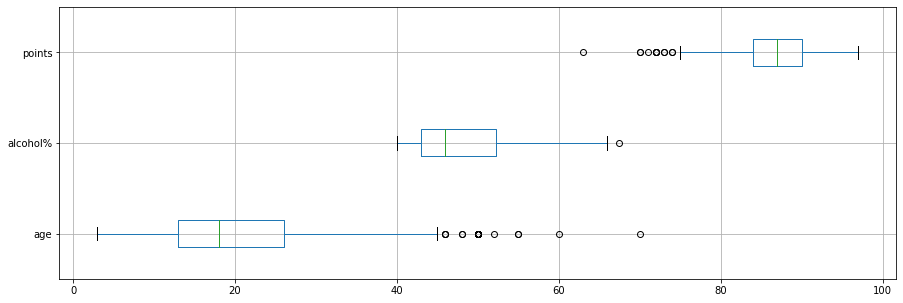

In [8]:
df=whisky_data_clean.loc[:,['age', 'alcohol%', 'points']]
df.boxplot(vert=False, figsize=(15,5))

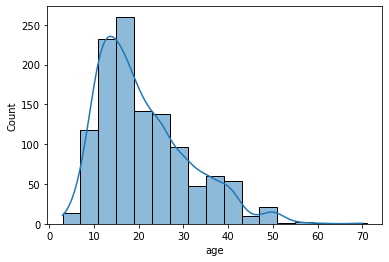

In [28]:
_=sns.histplot(whisky_data_clean['age'], binrange = (3, 70), binwidth = 4, kde=True)

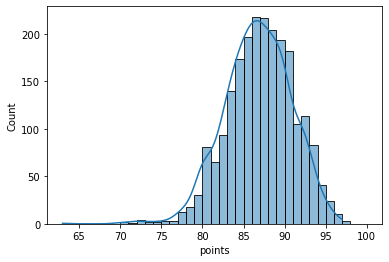

In [31]:
_=sns.histplot(whisky_data_clean['points'], binrange = (63, 100), binwidth = 1, kde=True)

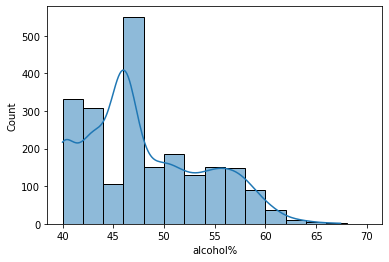

In [36]:
_=sns.histplot(whisky_data_clean['alcohol%'], binrange = (40, 70), binwidth = 2, kde=True)

<AxesSubplot:>

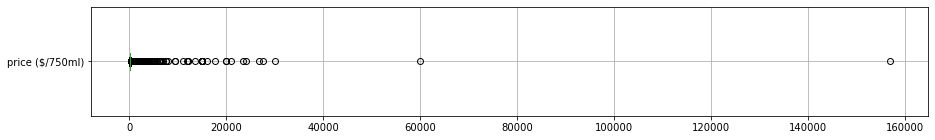

In [37]:
df=whisky_data_clean.loc[:,['price ($/750ml)']]
df.boxplot(vert=False, figsize=(15,2))

<AxesSubplot:>

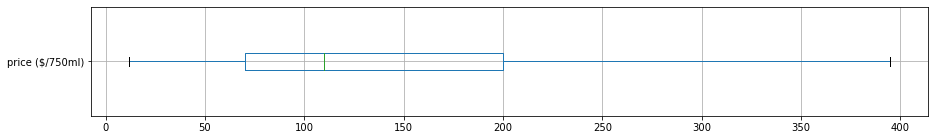

In [68]:
df.boxplot(vert=False, figsize=(15,2), sym='')

In [167]:
q75, q25 = np.percentile(whisky_data_clean['price ($/750ml)'], [75 ,25])
iqr = q75 - q25
hs_whisker_cost = iqr + 1.5*q75
ls_whisker_cost = iqr - 1.5*q25


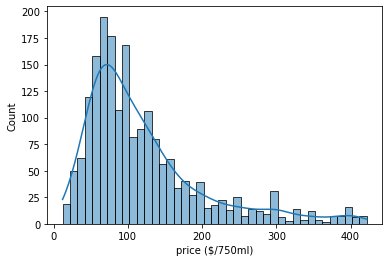

In [122]:
PriceCutoff=hs_whisker
width = 10
_=sns.histplot(((whisky_data_clean[whisky_data_clean['price ($/750ml)']<PriceCutoff])['price ($/750ml)']), binwidth= width ,kde=True)

In [123]:
PriceMask = whisky_data_clean['price ($/750ml)'] > hs_whisker
ExpensiveWhisky = whisky_data_clean[PriceMask]
ExpensiveWhisky.describe()

,points,price ($/750ml),age,alcohol%,cost_per_point
count,299.000000,299.000000,179.000000,297.000000,299.000000
mean,89.501672,3443.645485,34.944134,48.137037,37.837023
std,3.964926,10604.547856,9.422493,5.181194,114.335396
min,73.000000,438.000000,9.000000,40.000000,4.760000
25%,87.000000,600.000000,30.000000,44.000000,6.600000
50%,90.000000,956.000000,35.000000,47.000000,10.870000
75%,92.000000,2432.000000,40.000000,51.900000,26.285000
max,97.000000,157000.000000,70.000000,60.700000,1688.170000


<AxesSubplot:>

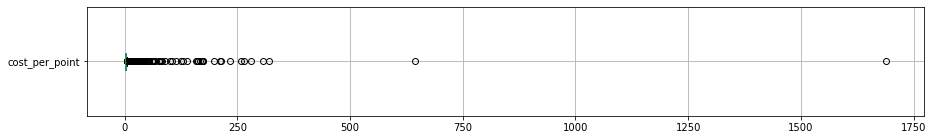

In [127]:
df=whisky_data_clean.loc[:,['cost_per_point']]
df.boxplot(vert=False, figsize=(15,2))

<AxesSubplot:>

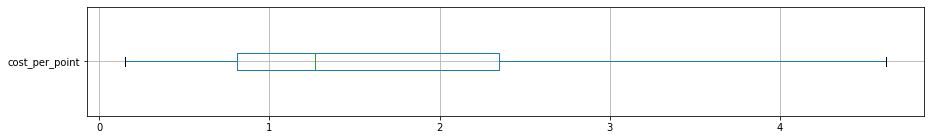

In [130]:
df.boxplot(vert=False, figsize=(15,2), sym='')

In [168]:
q75, q25 = np.percentile(whisky_data_clean['cost_per_point'], [75 ,25])
iqr = q75 - q25
hs_whisker_PointPrice = iqr + 1.5*q75
ls_whisker_PointPrice = iqr - 1.5*q25

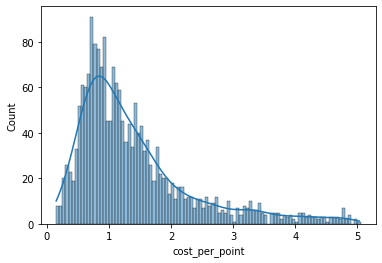

In [132]:
PointPriceCutoff=hs_whisker
width = 0.05
_=sns.histplot(((whisky_data_clean[whisky_data_clean['cost_per_point']<PointPriceCutoff])['cost_per_point']), binwidth= width ,kde=True)

In [134]:
PriceMask = whisky_data_clean['cost_per_point'] > hs_whisker
ExpensivePoints = whisky_data_clean[PriceMask]
ExpensivePoints.describe()

,points,price ($/750ml),age,alcohol%,cost_per_point
count,291.000000,291.000000,172.000000,289.000000,291.000000
mean,89.429553,3525.907216,34.970930,48.094118,38.742509
std,3.981555,10738.011559,9.422772,5.193626,115.768977
min,73.000000,440.000000,9.000000,40.000000,5.110000
25%,87.000000,600.000000,30.000000,44.000000,6.825000
50%,90.000000,1000.000000,35.000000,47.000000,11.100000
75%,92.000000,2750.000000,40.000000,51.900000,30.435000
max,97.000000,157000.000000,70.000000,60.700000,1688.170000


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


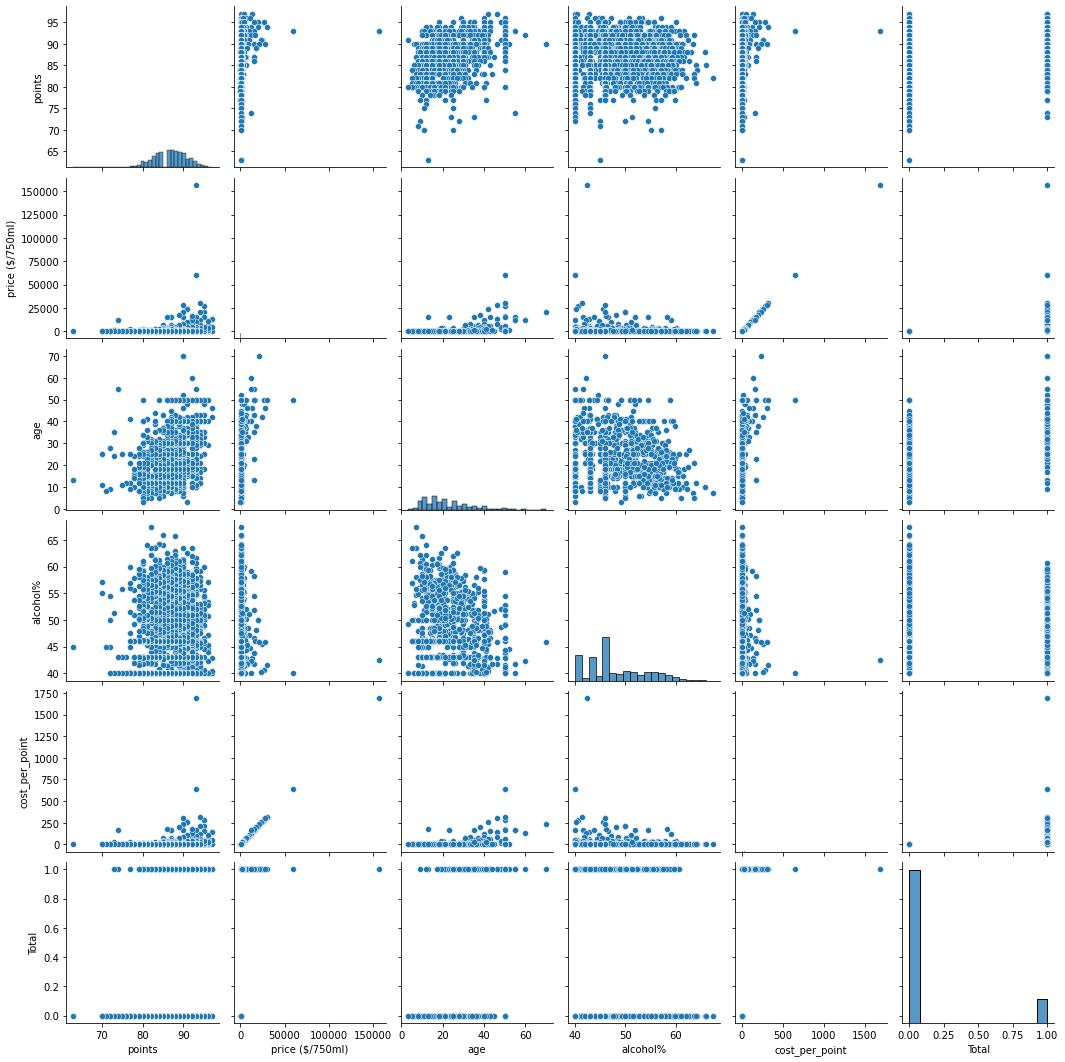

In [136]:
_ = sns.pairplot(whisky_data_clean)

In [137]:
whisky_data_clean.corr()

,points,price ($/750ml),age,alcohol%,cost_per_point,Total
points,1.000000,0.128946,0.360761,0.064312,0.125295,0.273170
price ($/750ml),0.128946,1.000000,0.388485,-0.035336,0.999737,0.280219
age,0.360761,0.388485,1.000000,-0.039866,0.391294,0.580866
alcohol%,0.064312,-0.035336,-0.039866,1.000000,-0.034796,0.014213
cost_per_point,0.125295,0.999737,0.391294,-0.034796,1.000000,0.284675
Total,0.273170,0.280219,0.580866,0.014213,0.284675,1.000000


<AxesSubplot:>

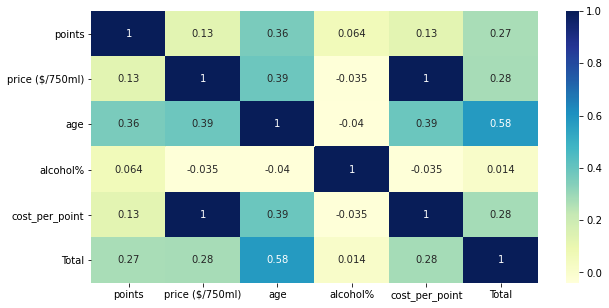

In [138]:
plt.figure(figsize=(10,5)) 
sns.heatmap(whisky_data_clean.corr(), annot=True, cmap="YlGnBu")

In [149]:
price= (whisky_data_clean[['price ($/750ml)','cost_per_point']])
price.describe()

,price ($/750ml),cost_per_point
count,2223.000000,2223.000000
mean,567.997601,6.295879
std,4046.398209,43.687614
min,12.000000,0.150000
25%,70.000000,0.810000
50%,110.000000,1.270000
75%,200.000000,2.350000
max,157000.000000,1688.170000


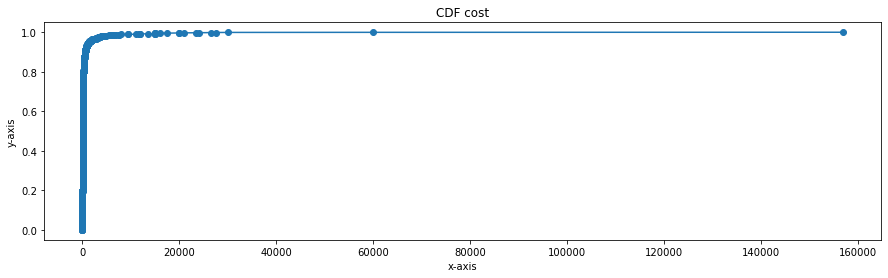

In [165]:
x = np.sort(whisky_data_clean['price ($/750ml)'])
y = np.arange(len(cost)) / float(len(cost))
plt.figure(figsize=(15,4))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF cost')
plt.plot(x, y, marker='o')

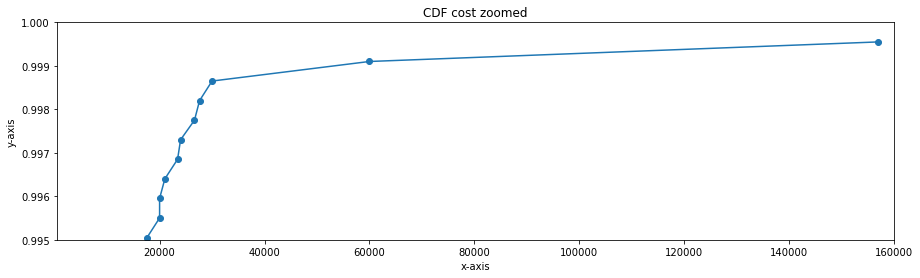

In [179]:
x = np.sort(whisky_data_clean['price ($/750ml)'])
y = np.arange(len(cost)) / float(len(cost))
plt.figure(figsize=(15,4))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.axis([hs_whisker_cost, 160000, 0.995, 1.0])
plt.title('CDF cost zoomed')
plt.plot(x, y, marker='o')

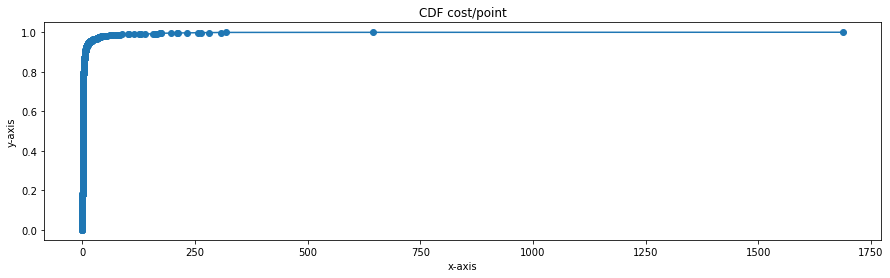

In [180]:
x = np.sort(whisky_data_clean['cost_per_point'])
y = np.arange(len(cost)) / float(len(cost))
plt.figure(figsize=(15,4))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF cost/point')
plt.plot(x, y, marker='o')

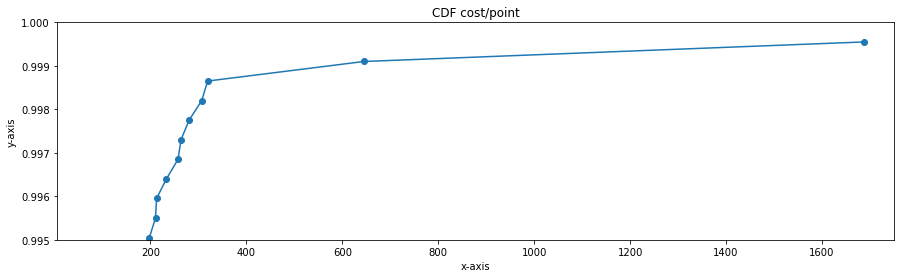

In [181]:
x = np.sort(whisky_data_clean['cost_per_point'])
y = np.arange(len(cost)) / float(len(cost))
plt.figure(figsize=(15,4))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.axis([hs_whisker_PointPrice, 1750, 0.995, 1.0])
plt.title('CDF cost/point')
plt.plot(x, y, marker='o')

<AxesSubplot:title={'center':'Point distribution for different types of Whisky'}, xlabel='points', ylabel='category'>

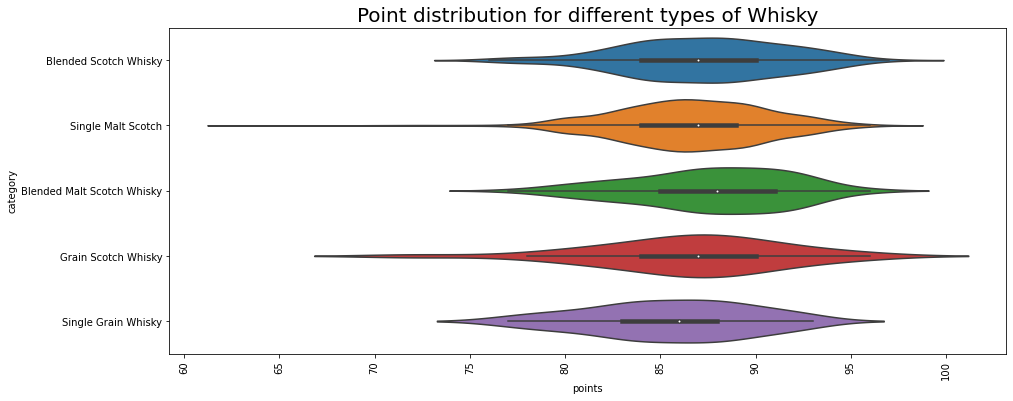

In [184]:
plt.figure(figsize=(15,6)) 
plt.title('Point distribution for different types of Whisky', fontdict={'fontsize': 20})
plt.xticks(rotation=90)
sns.violinplot(y="category",
                x="points", data=whisky_data_clean)

In [255]:
whisky_grouped = whisky_data_clean.groupby('category').median()
whisky_grouped.sort_values(by=('price ($/750ml)'))

,points,price ($/750ml),age,alcohol%,cost_per_point,Total
category,,,,,,
Blended Scotch Whisky,87.0,68.0,18.0,40.0,0.780,False
Blended Malt Scotch Whisky,88.0,70.0,18.0,46.0,0.820,False
Single Malt Scotch,87.0,115.0,18.0,46.0,1.340,False
Single Grain Whisky,86.0,124.0,26.5,51.5,1.450,False
Grain Scotch Whisky,87.0,125.0,32.0,49.3,1.535,False


<Figure size 1080x1440 with 0 Axes>

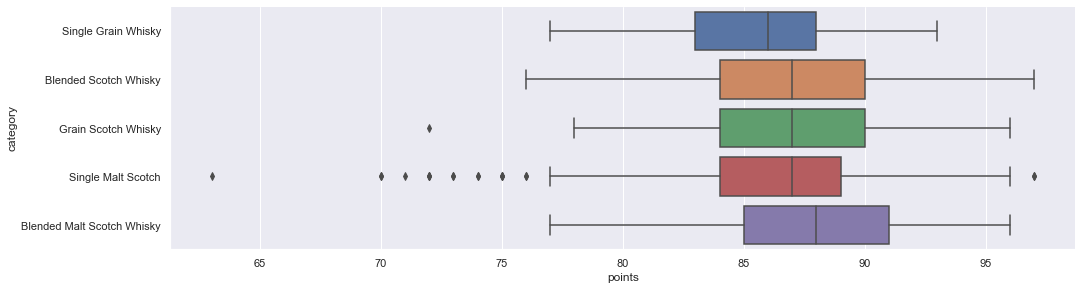

In [256]:
parameter = "points"
plt.figure(figsize = (15,20))
_=sns.catplot(y="category",
                x=parameter, data=whisky_data_clean, height=4, aspect=15/4, kind="box", order = whisky_grouped.sort_values(by=(parameter)).index)


<Figure size 1080x1440 with 0 Axes>

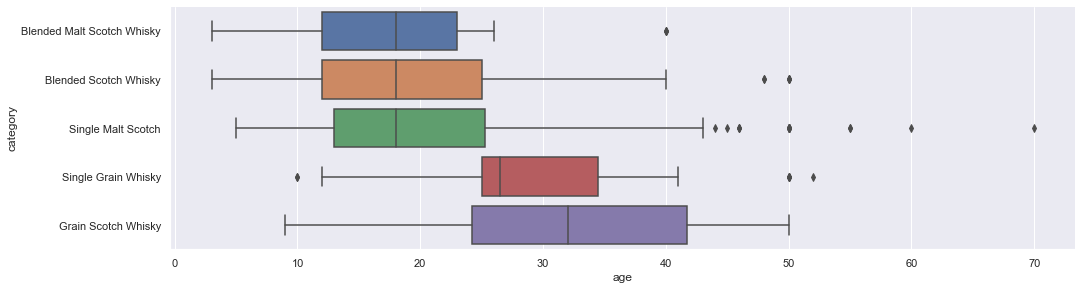

In [258]:
parameter = "age"
plt.figure(figsize = (15,20))
_=sns.catplot(y="category",
                x=parameter, data=whisky_data_clean, height=4, aspect=15/4, kind="box", order = whisky_grouped.sort_values(by=(parameter)).index)


<Figure size 1080x1440 with 0 Axes>

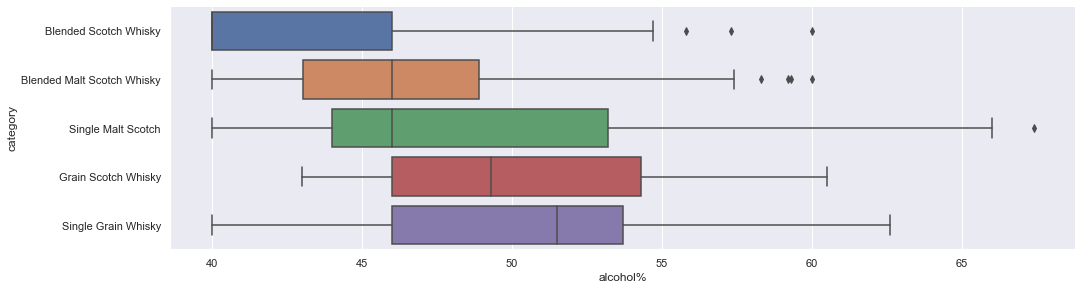

In [259]:
parameter = "alcohol%"
plt.figure(figsize = (15,20))
_=sns.catplot(y="category",
                x=parameter, data=whisky_data_clean, height=4, aspect=15/4, kind="box", order = whisky_grouped.sort_values(by=(parameter)).index)


<Figure size 1080x1440 with 0 Axes>

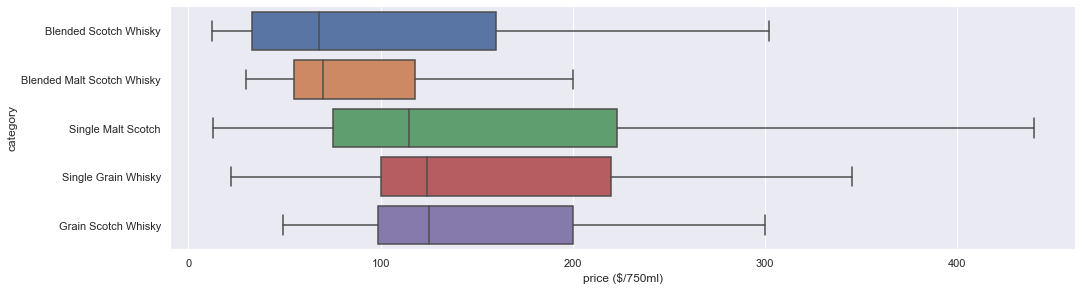

In [262]:
parameter = "price ($/750ml)"
plt.figure(figsize = (15,20))
_=sns.catplot(y="category",
                x=parameter, data=whisky_data_clean, sym='', height=4, aspect=15/4, kind="box", order = whisky_grouped.sort_values(by=(parameter)).index)


<Figure size 1080x1440 with 0 Axes>

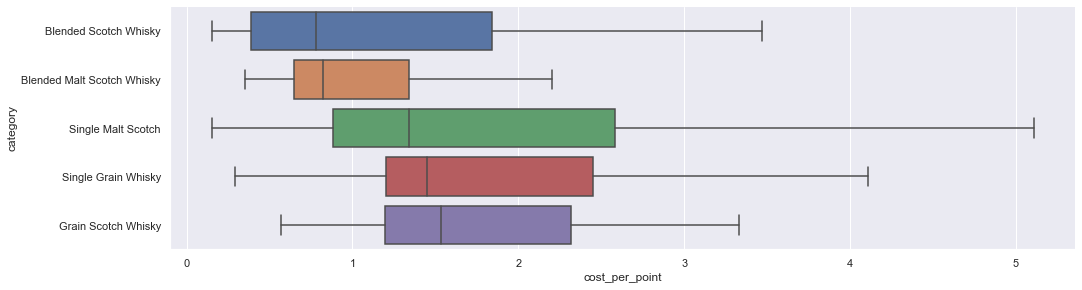

In [263]:
parameter = "cost_per_point"
plt.figure(figsize = (15,20))
_=sns.catplot(y="category",
                x=parameter, data=whisky_data_clean, sym='', height=4, aspect=15/4, kind="box", order = whisky_grouped.sort_values(by=(parameter)).index)


In [300]:
test=whisky_data_clean.loc[(whisky_data_clean['category'] == 'Single Malt Scotch') & (whisky_data_clean['price ($/750ml)'] < 200)]
test.sort_values(by=('points'), ascending=False).head(10)

,name,category,description,points,price ($/750ml),age,alcohol%,cost_per_point,Total
5,"Ardbeg Corryvreckan, 57.1%",Single Malt Scotch,"Powerful, muscular, well-textured, and invigor...",96.0,85.0,NaN,57.1,0.89,False
18,"Ardbeg Uigeadail, 54.2%",Single Malt Scotch,"With the Ardbeg 17 year old off the market, it...",95.0,70.0,NaN,54.2,0.74,False
67,"Highland Park 18 Year Old, 43%",Single Malt Scotch,Introduced to the Highland Park portfolio in 1...,94.0,112.0,NaN,43.0,1.19,False
69,Lagavulin 12 year old (Diageo Special Release...,Single Malt Scotch,This is the 15th Special Releases bottling of ...,94.0,130.0,12.0,56.5,1.38,False
68,"Lagavulin 12 year old, 56.5%",Single Malt Scotch,There’s precious little reticence about this b...,94.0,109.0,12.0,56.5,1.16,False
71,"The Macallan Fine Oak, 17 year old, 43%",Single Malt Scotch,Another of the Fine Oak series (aged in both b...,94.0,120.0,17.0,43.0,1.28,False
60,"Glenmorangie Astar 2017, 52.5%",Single Malt Scotch,The first bottling of Astar was released in 20...,94.0,100.0,NaN,52.5,1.06,False
55,"The Dalmore Stillman's Dram 28 Year Old, 45%",Single Malt Scotch,"For the past several years, the Stillman’s Dra...",94.0,140.0,NaN,45.0,1.49,False
43,"Aberfeldy 14 year old Single Cask, 58.1%",Single Malt Scotch,Single cask Aberfeldy bottlings are very few a...,94.0,181.0,14.0,58.1,1.93,False
119,"Glenmorangie Original, 10 year old, 43%",Single Malt Scotch,"Fresh, vibrant, and beautifully complex. A cle...",93.0,45.0,10.0,43.0,0.48,False


In [301]:
Distillery = "Ellen"
test=test[test.name.str.contains(Distillery)]
test.sort_values(by=('points'), ascending=False).head(10)

,name,category,description,points,price ($/750ml),age,alcohol%,cost_per_point,Total
349,The McGibbons Provenance (distilled at Port El...,Single Malt Scotch,"Amber color. Full aroma of peat smoke, with in...",91.0,110.0,19.0,62.5,1.21,False
691,"Provenance (distilled at Port Ellen), 21 year ...",Single Malt Scotch,One of the last remaining vintages from an Isl...,89.0,195.0,21.0,46.0,2.19,False
